<a href="https://colab.research.google.com/github/Laibasif/GiantVirusMarkersInProtists/blob/main/GiantVirusMarkersInProtists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.4 MB/s eta 0:00:00


In [2]:
from Bio import Entrez

Entrez.email = "laibasif99@gmail.com"  # Replace with your actual email


In [3]:
handle = Entrez.esearch(db="protein", term="Euglena gracilis[Organism]", retmax=100)
record = Entrez.read(handle)
protein_ids = record["IdList"]


In [4]:
print(f"Found {len(protein_ids)} protein IDs")


Found 100 protein IDs


In [7]:
# Step 2: Fetch 100 protein sequences from NCBI using Biopython

from Bio import Entrez, SeqIO

# Always include your email address (required by NCBI)
Entrez.email = "laibasif99@gmail.com"  # ← Replace with your actual email

# Step 2.1: Search for protein sequences
search_handle = Entrez.esearch(db="protein", term="Euglena gracilis[Organism]", retmax=100)
search_record = Entrez.read(search_handle)
protein_ids = search_record["IdList"]
print(f"Found {len(protein_ids)} protein IDs.")

# Step 2.2: Fetch sequences using the IDs
fetch_handle = Entrez.efetch(db="protein", id=protein_ids, rettype="fasta", retmode="text")
sequences = list(SeqIO.parse(fetch_handle, "fasta"))

# Step 2.3: Save sequences to a FASTA file
with open("euglena_proteins.fasta", "w") as out_f:
    SeqIO.write(sequences, out_f, "fasta")

print("Saved protein sequences to 'euglena_proteins.fasta'")

# Step 2.4: Display first 3 sequences as a preview
for seq_record in sequences[:101]:
    print(f">{seq_record.id}\n{seq_record.seq[:80]}...\n")  # Print first 80 amino acids


Found 100 protein IDs.
Saved protein sequences to 'euglena_proteins.fasta'
>sp|P83688.1|CC12_EUGGR
SGSGVRSAKKGGKAQGGQAGVGYKGSTEPG...

>sp|P84737.1|PALFB_EUGGR
MYILVWKEGQQIRTFQDLEECGQFQTASNITDGQIFSINVTPTMSKGGETGETQLRRLMYLSASTEPEKCYAEYLADMAH...

>sp|P40279.1|H2A_EUGGR
MSTTTPPPAKGGKDKKGAKAGVKKGKTGGSGQSKKAGLTFPVGRTGSLLRAGRYAKRVGKGAPVYLAAVLEYLSAELLEL...

>sp|P21511.1|RK14_EUGGR
MIKPQTYLKIADNTGAQKIMCIRILGPNCQYANIGDIIIAVVKEAIPNMVVKKSDIVKAVIVRTVKGVRRESGMAIRFDE...

>sp|P00076.1|CYC_EUGGR
GDAERGKKLFESRAAQCHSAQKGVNSTGPSLWGVYGRTSGSVPGYAYSNANKNAAIVWEEETLHKFLENPKKYVPGTKMA...

>sp|Q39724.1|RL10_EUGGR
MGRRPAKCYRYCKNKAYPKSRYCRGVPEAKIRIYDCGMRKLNADTFPLTYHLISMEREQIGSEALEAARINANKYMIKNA...

>sp|P31915.1|RK12_EUGGR
MSTETDEILERLKKITLLEAYELVKQIENTFGVDATIALSASNTNPSILPSKADETVVEEKTEFDVIIQEVPSAKRINVI...

>sp|P31476.1|ATPB_EUGGR
MKSSLRLNTGIILQIIGPVMDISFPSGKMPNIYNSLLIEGKTESGDRLKVVCEVQQLLGDNVVRAIAMSATDGLQRGIKV...

>sp|P19166.2|RK22_EUGGR
MEQKKPLESSASIKYVRISPFKVRRILNQIKGRSAKEALMILKFMPYKPSTLIFKLLKSAVSNSIKNYDEDANVLRVLEA

In [8]:
from Bio import SeqIO

# Fetch the sequences in FASTA format
handle = Entrez.efetch(db="protein", id=protein_ids, rettype="fasta", retmode="text")
sequences = list(SeqIO.parse(handle, "fasta"))

# Save to a FASTA file
with open("euglena_proteins.fasta", "w") as output_handle:
    SeqIO.write(sequences, output_handle, "fasta")

print("Saved 100 Euglena protein sequences to 'euglena_proteins.fasta'")


Saved 100 Euglena protein sequences to 'euglena_proteins.fasta'


In [20]:
from Bio import SeqIO

records = list(SeqIO.parse("euglena_proteins.fasta", "fasta"))
print(f"Total sequences: {len(records)}")


Total sequences: 100


In [10]:
from Bio import Entrez, SeqIO

Entrez.email = "laiba.bioinfo@gmail.com"  # Your email again

# Search for viral DNA Polymerase B proteins
search_handle = Entrez.esearch(
    db="protein",
    term="DNA polymerase B[Protein Name] AND Viruses[Organism]",
    retmax=10
)
search_record = Entrez.read(search_handle)
viral_ids = search_record["IdList"]
print(f"Found {len(viral_ids)} viral PolB protein IDs.")

# Fetch the sequences
fetch_handle = Entrez.efetch(db="protein", id=viral_ids, rettype="fasta", retmode="text")
viral_sequences = list(SeqIO.parse(fetch_handle, "fasta"))

# Save to a FASTA file
with open("viral_polB.fasta", "w") as out_f:
    SeqIO.write(viral_sequences, out_f, "fasta")

print("Saved viral DNA polymerase B sequences to 'viral_polB.fasta'")


Found 10 viral PolB protein IDs.
Saved viral DNA polymerase B sequences to 'viral_polB.fasta'


In [11]:
# Install NCBI BLAST+ tools
!apt-get install ncbi-blast+ -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ncbi-data
The following NEW packages will be installed:
  ncbi-blast+ ncbi-data
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 15.8 MB of archives.
After this operation, 71.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-data all 6.1.20170106+dfsg1-9 [3,519 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-blast+ amd64 2.12.0+ds-3build1 [12.3 MB]
Fetched 15.8 MB in 1s (31.0 MB/s)
Selecting previously unselected package ncbi-data.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../ncbi-data_6.1.20170106+dfsg1-9_all.deb ...
Unpacking ncbi-data (6.1.20170106+dfsg1-9) ...
Selecting previously unselected package ncbi-blast+.
Preparing to unpack .../ncbi-blast+_2.12.0+ds-3build1_amd64.deb .

In [12]:
# Create a BLAST database from euglena_proteins.fasta
!makeblastdb -in euglena_proteins.fasta -dbtype prot -out euglena_db




Building a new DB, current time: 05/18/2025 18:42:31
New DB name:   /content/euglena_db
New DB title:  euglena_proteins.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 100 sequences in 0.00330687 seconds.




In [13]:
# Run BLAST: viral PolB proteins against Euglena proteins
!blastp -query viral_polB.fasta -db euglena_db -out results.txt -evalue 1e-5 -outfmt 6


In [14]:
# Show first 10 lines of BLAST results
!head results.txt


In [16]:
import pandas as pd

# Load results.txt as a DataFrame
columns = ["Query_ID", "Subject_ID", "Percent_Identity", "Alignment_Length",
           "Mismatches", "Gap_Opens", "Q_Start", "Q_End", "S_Start", "S_End",
           "E_value", "Bit_Score"]

df = pd.read_csv("results.txt", sep="\t", names=columns)

# Show top 5 rows
df.head()



Empty DataFrame
Columns: [Query_ID, Subject_ID, Percent_Identity, Alignment_Length, Mismatches, Gap_Opens, Q_Start, Q_End, S_Start, S_End, E_value, Bit_Score]
Index: []

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

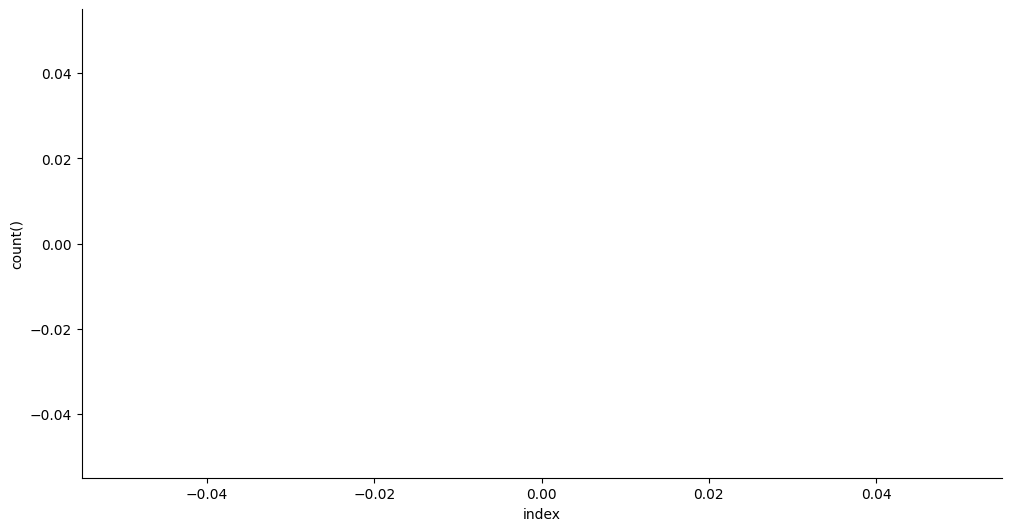

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [17]:
# Filter for strong hits: >30% identity and E-value < 1e-10
strong_hits = df[(df["Percent_Identity"] > 30) & (df["E_value"] < 1e-10)]
strong_hits


Empty DataFrame
Columns: [Query_ID, Subject_ID, Percent_Identity, Alignment_Length, Mismatches, Gap_Opens, Q_Start, Q_End, S_Start, S_End, E_value, Bit_Score]
Index: []

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [21]:
with open("results.txt") as f:
    content = f.read()
    print("File length:", len(content))
    print("Preview:\n", content[:500])



File length: 0
Preview:
 


In [22]:
!blastp -query euglena_proteins.fasta -db euglena_db -out results.txt -evalue 1000 -outfmt 6


In [23]:
!head results.txt


sp|P83688.1|CC12_EUGGR	sp|P83688.1|CC12_EUGGR	100.000	30	0	0	1	30	1	30	1.38e-15	54.7
sp|P83688.1|CC12_EUGGR	sp|P30389.1|RR2_EUGGR	50.000	10	5	0	5	14	56	65	2.7	16.5
sp|P83688.1|CC12_EUGGR	sp|P21512.2|RK16_EUGGR	75.000	8	2	0	6	13	56	63	9.8	15.0
sp|P83688.1|CC12_EUGGR	sp|Q9XEK9.1|IF2C_EUGGR	38.095	21	13	0	1	21	399	419	11	15.0
sp|P83688.1|CC12_EUGGR	sp|P23580.1|RPOC1_EUGGR	57.143	7	3	0	4	10	381	387	16	14.6
sp|P83688.1|CC12_EUGGR	sp|P21508.1|RR8_EUGGR	31.818	22	15	0	1	22	89	110	16	14.6
sp|P83688.1|CC12_EUGGR	sp|P23579.1|RPOB_EUGGR	36.842	19	12	0	7	25	673	691	21	14.2
sp|P83688.1|CC12_EUGGR	sp|Q94IN5.1|PNO_EUGGR	53.333	15	6	1	9	22	658	672	22	14.2
sp|P83688.1|CC12_EUGGR	sp|Q94IN5.1|PNO_EUGGR	35.294	17	11	0	9	25	418	434	36	13.9
sp|P83688.1|CC12_EUGGR	sp|Q94IN5.1|PNO_EUGGR	28.571	14	10	0	15	28	572	585	178	11.9


In [25]:
import pandas as pd

# Define column names for BLAST tabular outfmt 6
columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen',
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Load the file into a dataframe
df = pd.read_csv('results.txt', sep='\t', names=columns)

# Show top hits sorted by bitscore (descending)
top_hits = df.sort_values(by='bitscore', ascending=False)

print(top_hits.head(10))


                        qseqid                   sseqid   pident  length  \
5693     sp|Q94IN5.1|PNO_EUGGR    sp|Q94IN5.1|PNO_EUGGR  100.000    1803   
11880    sp|P16881.1|RBS_EUGGR    sp|P16881.1|RBS_EUGGR  100.000    1273   
8290    sp|P23579.1|RPOB_EUGGR   sp|P23579.1|RPOB_EUGGR  100.000    1082   
5301   sp|Q8S9F2.1|PCYAA_EUGGR  sp|Q8S9F2.1|PCYAA_EUGGR  100.000    1019   
4038   sp|P84738.2|PAL1F_EUGGR  sp|P84738.2|PAL1F_EUGGR  100.000    1019   
28     sp|P84737.1|PALFB_EUGGR  sp|P84737.1|PALFB_EUGGR  100.000    1019   
3790   sp|P84739.2|PALST_EUGGR  sp|P84739.2|PALST_EUGGR  100.000    1019   
5302   sp|Q8S9F2.1|PCYAA_EUGGR  sp|P84737.1|PALFB_EUGGR   94.406    1019   
29     sp|P84737.1|PALFB_EUGGR  sp|Q8S9F2.1|PCYAA_EUGGR   94.406    1019   
4482   sp|P84741.1|PBLFB_EUGGR  sp|P84741.1|PBLFB_EUGGR  100.000     859   

       mismatch  gapopen  qstart  qend  sstart  send  evalue  bitscore  
5693          0        0       1  1803       1  1803     0.0    3784.0  
11880         0  

In [26]:
import pandas as pd

# Define BLAST columns for outfmt 6
columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen',
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Load the BLAST results file
df = pd.read_csv('results.txt', sep='\t', names=columns)

# Print all rows
print(df.to_string())


                        qseqid                   sseqid   pident  length  mismatch  gapopen  qstart  qend  sstart  send         evalue  bitscore
0       sp|P83688.1|CC12_EUGGR   sp|P83688.1|CC12_EUGGR  100.000      30         0        0       1    30       1    30   1.380000e-15      54.7
1       sp|P83688.1|CC12_EUGGR    sp|P30389.1|RR2_EUGGR   50.000      10         5        0       5    14      56    65   2.700000e+00      16.5
2       sp|P83688.1|CC12_EUGGR   sp|P21512.2|RK16_EUGGR   75.000       8         2        0       6    13      56    63   9.800000e+00      15.0
3       sp|P83688.1|CC12_EUGGR   sp|Q9XEK9.1|IF2C_EUGGR   38.095      21        13        0       1    21     399   419   1.100000e+01      15.0
4       sp|P83688.1|CC12_EUGGR  sp|P23580.1|RPOC1_EUGGR   57.143       7         3        0       4    10     381   387   1.600000e+01      14.6
5       sp|P83688.1|CC12_EUGGR    sp|P21508.1|RR8_EUGGR   31.818      22        15        0       1    22      89   110   1.600000

In [27]:
pd.set_option('display.max_rows', None)  # Show all rows
print(df)


                        qseqid                   sseqid   pident  length  \
0       sp|P83688.1|CC12_EUGGR   sp|P83688.1|CC12_EUGGR  100.000      30   
1       sp|P83688.1|CC12_EUGGR    sp|P30389.1|RR2_EUGGR   50.000      10   
2       sp|P83688.1|CC12_EUGGR   sp|P21512.2|RK16_EUGGR   75.000       8   
3       sp|P83688.1|CC12_EUGGR   sp|Q9XEK9.1|IF2C_EUGGR   38.095      21   
4       sp|P83688.1|CC12_EUGGR  sp|P23580.1|RPOC1_EUGGR   57.143       7   
5       sp|P83688.1|CC12_EUGGR    sp|P21508.1|RR8_EUGGR   31.818      22   
6       sp|P83688.1|CC12_EUGGR   sp|P23579.1|RPOB_EUGGR   36.842      19   
7       sp|P83688.1|CC12_EUGGR    sp|Q94IN5.1|PNO_EUGGR   53.333      15   
8       sp|P83688.1|CC12_EUGGR    sp|Q94IN5.1|PNO_EUGGR   35.294      17   
9       sp|P83688.1|CC12_EUGGR    sp|Q94IN5.1|PNO_EUGGR   28.571      14   
10      sp|P83688.1|CC12_EUGGR    sp|Q94IN5.1|PNO_EUGGR   57.143       7   
11      sp|P83688.1|CC12_EUGGR    sp|P12457.1|TBB_EUGGR   66.667       6   
12      sp|P

In [28]:
filtered_df = df[(df['pident'] > 50) & (df['evalue'] < 1e-5)]
print(filtered_df.to_string())


                        qseqid                   sseqid   pident  length  mismatch  gapopen  qstart  qend  sstart  send         evalue  bitscore
0       sp|P83688.1|CC12_EUGGR   sp|P83688.1|CC12_EUGGR  100.000      30         0        0       1    30       1    30   1.380000e-15      54.7
28     sp|P84737.1|PALFB_EUGGR  sp|P84737.1|PALFB_EUGGR  100.000    1019         0        0       1  1019       1  1019   0.000000e+00    2114.0
29     sp|P84737.1|PALFB_EUGGR  sp|Q8S9F2.1|PCYAA_EUGGR   94.406    1019        57        0       1  1019       1  1019   0.000000e+00    1992.0
30     sp|P84737.1|PALFB_EUGGR  sp|P84738.2|PAL1F_EUGGR   81.703    1022       181        4       1  1019       1  1019   0.000000e+00    1680.0
31     sp|P84737.1|PALFB_EUGGR  sp|P84739.2|PALST_EUGGR   87.484     783        98        0       1   783       1   783   0.000000e+00    1393.0
36     sp|P84737.1|PALFB_EUGGR  sp|Q8S9F1.1|PCYAB_EUGGR   68.543     817       251        3       1   812       1   816   0.000000

In [29]:
sorted_df = df.sort_values(by='bitscore', ascending=False)
print(sorted_df.to_string())


                        qseqid                   sseqid   pident  length  mismatch  gapopen  qstart  qend  sstart  send         evalue  bitscore
5693     sp|Q94IN5.1|PNO_EUGGR    sp|Q94IN5.1|PNO_EUGGR  100.000    1803         0        0       1  1803       1  1803   0.000000e+00    3784.0
11880    sp|P16881.1|RBS_EUGGR    sp|P16881.1|RBS_EUGGR  100.000    1273         0        0       1  1273       1  1273   0.000000e+00    2629.0
8290    sp|P23579.1|RPOB_EUGGR   sp|P23579.1|RPOB_EUGGR  100.000    1082         0        0       1  1082       1  1082   0.000000e+00    2191.0
5301   sp|Q8S9F2.1|PCYAA_EUGGR  sp|Q8S9F2.1|PCYAA_EUGGR  100.000    1019         0        0       1  1019       1  1019   0.000000e+00    2117.0
4038   sp|P84738.2|PAL1F_EUGGR  sp|P84738.2|PAL1F_EUGGR  100.000    1019         0        0       1  1019       1  1019   0.000000e+00    2116.0
28     sp|P84737.1|PALFB_EUGGR  sp|P84737.1|PALFB_EUGGR  100.000    1019         0        0       1  1019       1  1019   0.000000

In [30]:
hits_count = df['qseqid'].value_counts()
print(hits_count)


qseqid
sp|Q94IN5.1|PNO_EUGGR      334
sp|P23579.1|RPOB_EUGGR     301
sp|P19430.2|PSAA_EUGGR     292
sp|Q9XEK9.1|IF2C_EUGGR     281
sp|P08976.1|LH18_EUGGR     267
sp|Q2PDF6.1|RTPR_EUGGR     266
sp|P23580.1|RPOC1_EUGGR    264
sp|Q8S9F2.1|PCYAA_EUGGR    263
sp|P23581.1|RPOC2_EUGGR    260
sp|P33625.1|TBA_EUGGR      259
sp|P43265.1|QCR2_EUGGR     253
sp|P16881.1|RBS_EUGGR      253
sp|P13446.1|HEM3_EUGGR     250
sp|P43264.1|QCR1_EUGGR     249
sp|P19431.1|PSAB_EUGGR     248
sp|P84739.2|PALST_EUGGR    248
sp|P84738.2|PAL1F_EUGGR    247
sp|P05700.2|PSBC_EUGGR     245
sp|Q6WNG7.1|D4FAD_EUGGR    244
sp|P84737.1|PALFB_EUGGR    242
sp|P31476.1|ATPB_EUGGR     234
sp|Q9SWQ9.1|SLD1_EUGGR     232
sp|P12457.1|TBB_EUGGR      229
sp|Q8GZR2.2|CYF_EUGGR      229
sp|Q5EU90.1|TER_EUGGR      225
sp|P31916.3|MAT2_EUGGR     224
sp|P06631.2|PSBA_EUGGR     223
sp|P20114.1|CY1_EUGGR      222
sp|P14963.1|EF1A_EUGGR     221
pdb|6TDV|h                 221
pdb|6TDV|a                 220
sp|P30392.1|ATPA_EUGGR     220
s

In [31]:
filtered_df.to_csv('filtered_results.txt', sep='\t', index=False)


In [32]:
print(df[['pident', 'evalue', 'bitscore']].describe())


             pident        evalue      bitscore
count  16622.000000  16622.000000  16622.000000
mean      39.416689    362.038692     26.055781
std       15.329238    288.452052    114.125877
min       12.500000      0.000000     10.400000
25%       28.571000    104.000000     14.200000
50%       35.714000    296.000000     15.400000
75%       46.154000    585.000000     16.900000
max      100.000000   1000.000000   3784.000000


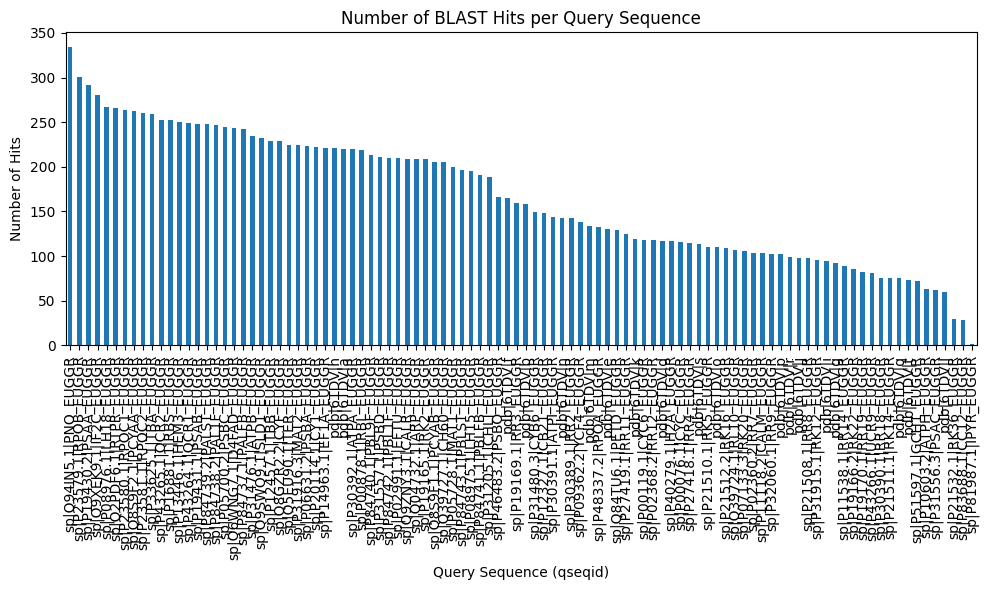

In [33]:
import matplotlib.pyplot as plt

hits_count = df['qseqid'].value_counts()

plt.figure(figsize=(10,6))
hits_count.plot(kind='bar')
plt.xlabel('Query Sequence (qseqid)')
plt.ylabel('Number of Hits')
plt.title('Number of BLAST Hits per Query Sequence')
plt.tight_layout()
plt.show()


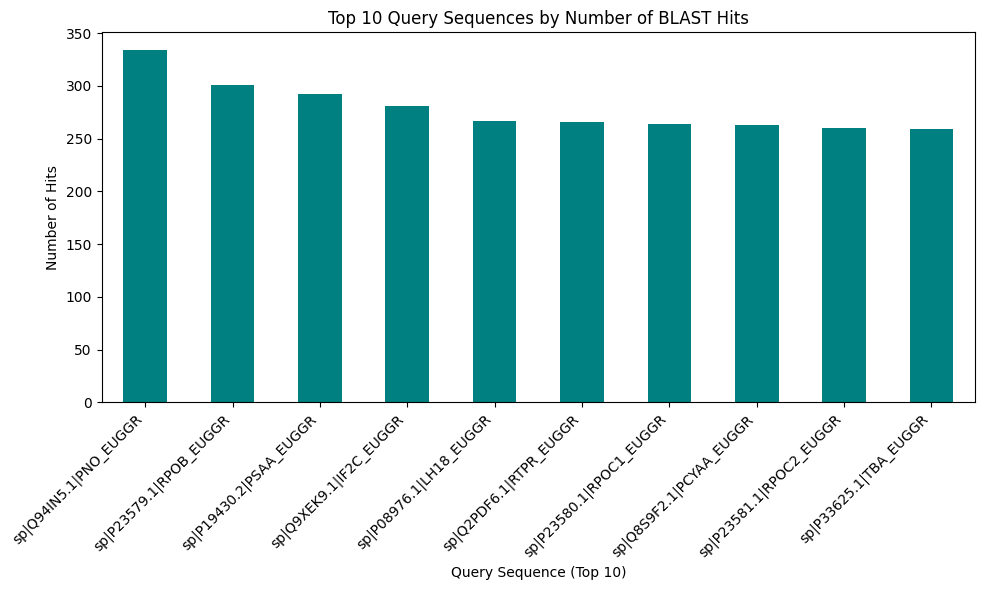

In [34]:
top_n = 10  # number of top qseqid to show

hits_count = df['qseqid'].value_counts().head(top_n)

plt.figure(figsize=(10,6))
hits_count.plot(kind='bar', color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Query Sequence (Top {})'.format(top_n))
plt.ylabel('Number of Hits')
plt.title('Top {} Query Sequences by Number of BLAST Hits'.format(top_n))
plt.tight_layout()
plt.show()


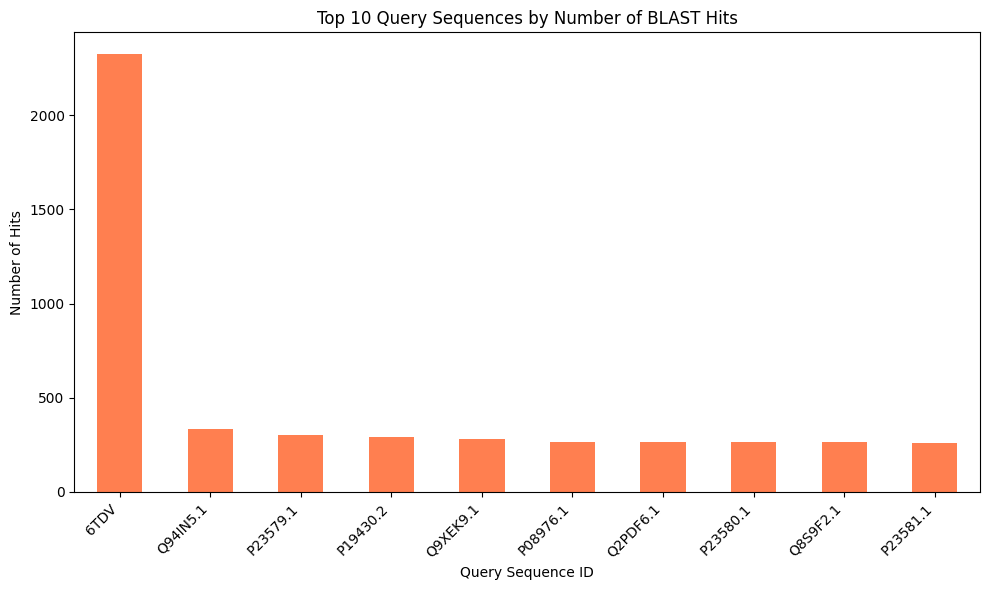

In [35]:
# Extract shorter labels from qseqid
df['qseqid_short'] = df['qseqid'].apply(lambda x: x.split('|')[1])  # Extract P83688.1 part

top_n = 10
hits_count = df['qseqid_short'].value_counts().head(top_n)

plt.figure(figsize=(10,6))
hits_count.plot(kind='bar', color='coral')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Query Sequence ID')
plt.ylabel('Number of Hits')
plt.title('Top {} Query Sequences by Number of BLAST Hits'.format(top_n))
plt.tight_layout()
plt.show()


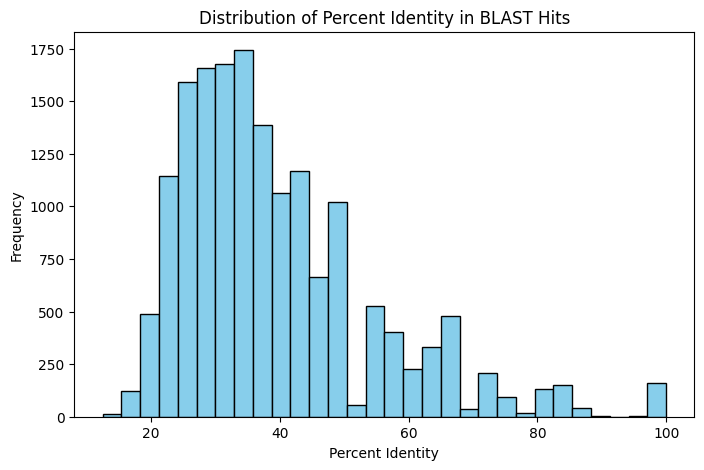

In [36]:
plt.figure(figsize=(8,5))
plt.hist(df['pident'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Percent Identity')
plt.ylabel('Frequency')
plt.title('Distribution of Percent Identity in BLAST Hits')
plt.show()


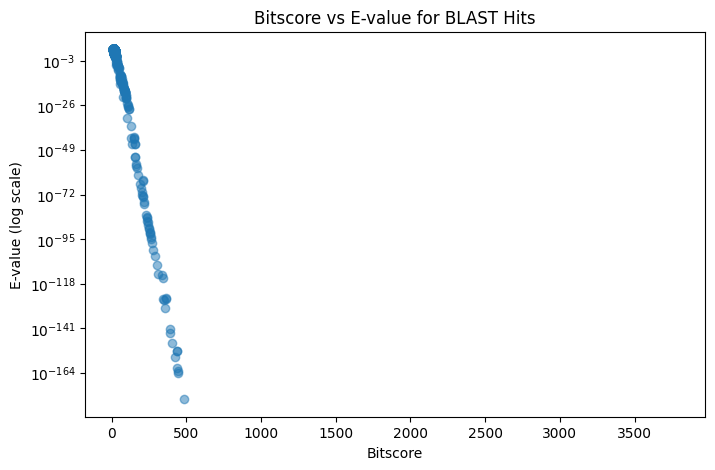

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(df['bitscore'], df['evalue'], alpha=0.5)
plt.yscale('log')  # Because e-values span several orders of magnitude
plt.xlabel('Bitscore')
plt.ylabel('E-value (log scale)')
plt.title('Bitscore vs E-value for BLAST Hits')
plt.show()


In [39]:
pivot_table = df.groupby(['qseqid', 'sseqid'])['pident'].max().unstack(fill_value=0)


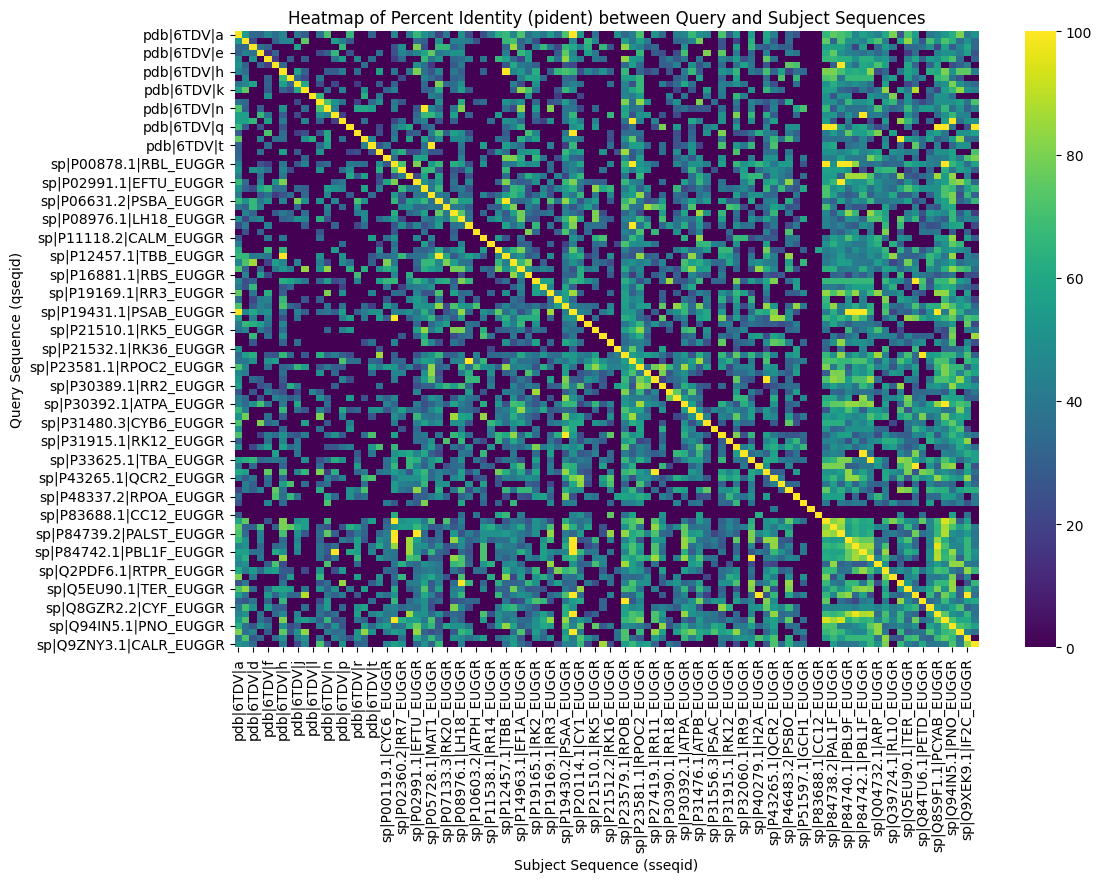

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of Percent Identity (pident) between Query and Subject Sequences')
plt.xlabel('Subject Sequence (sseqid)')
plt.ylabel('Query Sequence (qseqid)')
plt.show()
